# Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

# Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

#### Age (numeric)
#### Sex (text: male, female)
#### Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
#### Housing (text: own, rent, or free)
#### Saving accounts (text - little, moderate, quite rich, rich)
#### Checking account (numeric, in DM - Deutsch Mark)
#### Credit amount (numeric, in DM)
#### Duration (numeric, in month)
#### Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
#### Risk (Value target - Good or Bad Risk)

## Objective: Calculate the credit score for each individual and validate their Credit Risk

In [176]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("C:/Users/lai.jieyan/kaggleproject/german_credit_data.csv",index_col=0)
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')
from sklearn.preprocessing import OneHotEncoder
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

# df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
# df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
# df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [174]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["little", "moderate", "quite rich", "rich", 'no_inf'])
df_credit["Saving accounts"]= le.transform(df_credit["Saving accounts"])

le.fit(["little", "moderate", "rich", 'no_inf'])
df_credit["Checking account"]= le.transform(df_credit["Checking account"])

le.fit(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'])
df_credit["Purpose"]= le.transform(df_credit["Purpose"])


le.fit(['male', 'female'])
df_credit["Sex"]= le.transform(df_credit["Sex"])



del df_credit["Housing"]

del df_credit["Risk"]
del df_credit['Risk_good']
del df_credit["Age_cat"]


Binning on 1000 rows and 15 columns in 00:00:25
Woe transformating on 700 rows and 14 columns in 00:00:23
Woe transformating on 300 rows and 14 columns in 00:00:21


C:\Users\lai.jieyan\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lai.jieyan\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lai.jieyan\AppData\Local\anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  ], ignore_index=True)


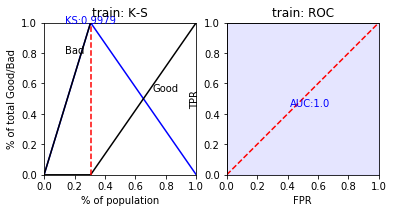

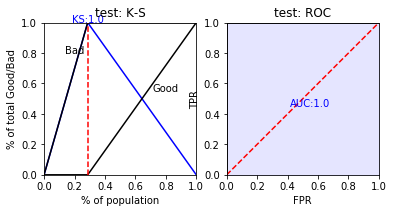

{'Age': <Figure size 432x288 with 2 Axes>,
 'Age_cat_Adult': <Figure size 432x288 with 2 Axes>,
 'Age_cat_Senior': <Figure size 432x288 with 2 Axes>,
 'Age_cat_Young': <Figure size 432x288 with 2 Axes>,
 'Checking account': <Figure size 432x288 with 2 Axes>,
 'Credit amount': <Figure size 432x288 with 2 Axes>,
 'Duration': <Figure size 432x288 with 2 Axes>,
 'Housing_own': <Figure size 432x288 with 2 Axes>,
 'Housing_rent': <Figure size 432x288 with 2 Axes>,
 'Job': <Figure size 432x288 with 2 Axes>,
 'Purpose': <Figure size 432x288 with 2 Axes>,
 'Saving accounts': <Figure size 432x288 with 2 Axes>,
 'Sex': <Figure size 432x288 with 2 Axes>,
 'Sex_male': <Figure size 432x288 with 2 Axes>}

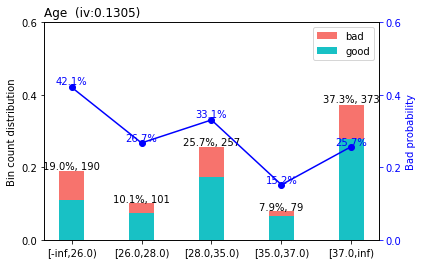

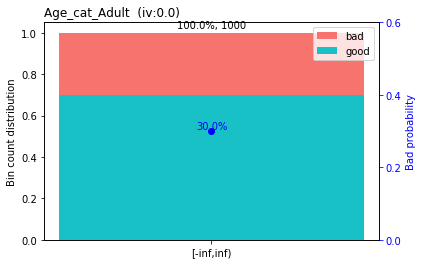

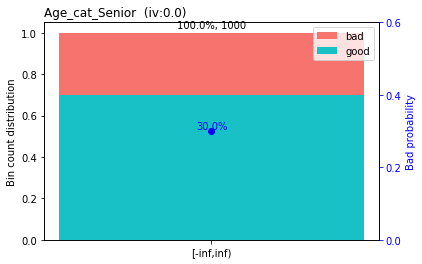

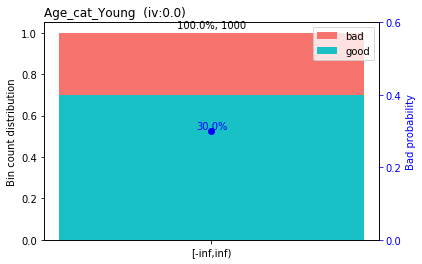

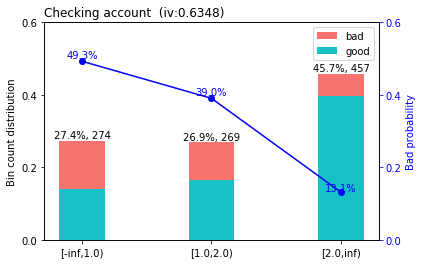

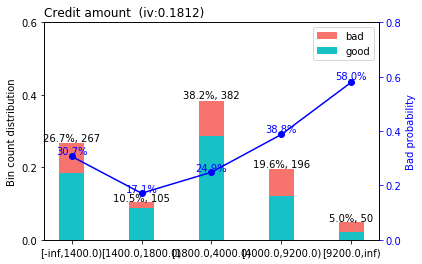

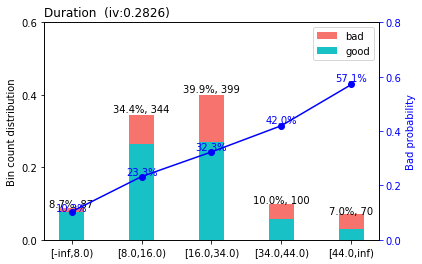

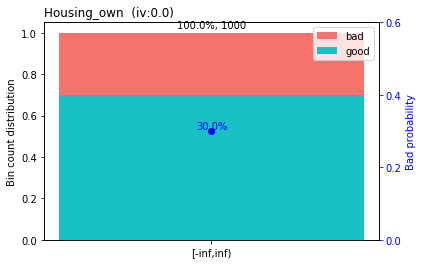

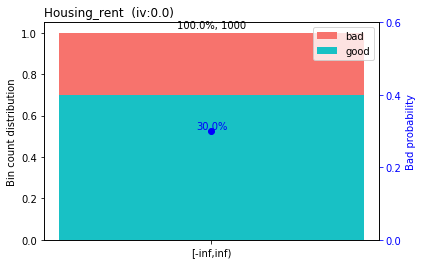

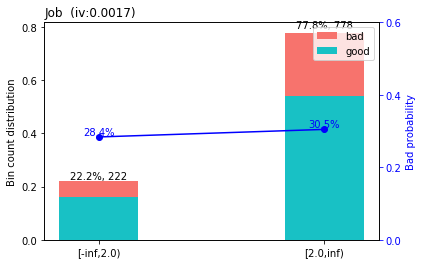

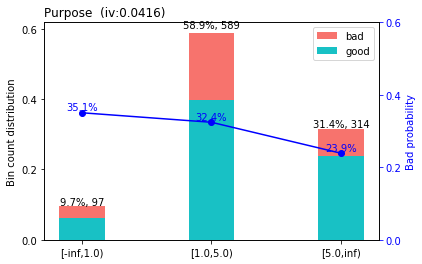

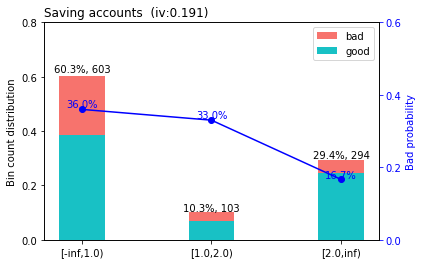

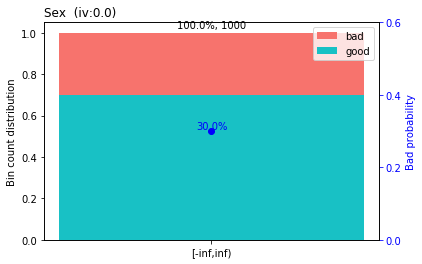

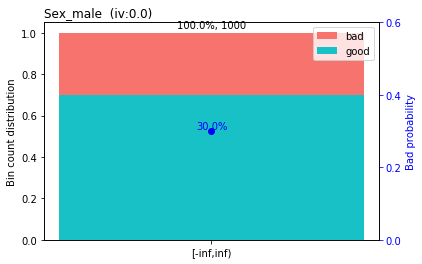

In [175]:
# lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(df_credit,df_credit['Risk_bad'], test_size=0.3, random_state= 0)

bins= sc.woebin(df_credit, y="Risk_bad")
train_woe = sc.woebin_ply(X_train, bins)
test_woe = sc.woebin_ply(X_test, bins)
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(X_train, card, print_step=0)
test_score = sc.scorecard_ply(X_test, card, print_step=0)
sc.woebin_plot(bins)